# Create Test Model to convert to TensorFlow Lite

-> https://www.tensorflow.org/lite/guide/get_started#2_convert_the_model_format

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt

Import all packages and set up a test cnn  
-> https://www.tensorflow.org/tutorials/images/cnn

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Print a summary of the CNN Example:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

List all avaible hardware for computing training

In [5]:
print("GPU: ", tf.config.list_physical_devices('GPU'))
print("CPU: ", tf.config.list_physical_devices('CPU'))
print("TPU: ", tf.config.list_physical_devices('TPU'))

GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TPU:  []


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 465us/sample - loss: 1.5529 - accuracy: 0.4338 - val_loss: 1.3699 - val_accuracy: 0.5061
Epoch 2/10
50000/50000 [==============================] - 20s 392us/sample - loss: 1.1668 - accuracy: 0.5872 - val_loss: 1.0644 - val_accuracy: 0.6229
Epoch 3/10
50000/50000 [==============================] - 19s 385us/sample - loss: 1.0136 - accuracy: 0.6453 - val_loss: 0.9765 - val_accuracy: 0.6537
Epoch 4/10
50000/50000 [==============================] - 21s 422us/sample - loss: 0.9139 - accuracy: 0.6802 - val_loss: 0.9497 - val_accuracy: 0.6673
Epoch 5/10
50000/50000 [==============================] - 22s 434us/sample - loss: 0.8424 - accuracy: 0.7061 - val_loss: 0.8825 - val_accuracy: 0.6956
Epoch 6/10
50000/50000 [==============================] - 20s 400us/sample - loss: 0.7952 - accuracy: 0.7211 - val_loss: 0.8765 - val_accuracy: 0.6976
Epoch 7/10
50000/50000 [====================

10000/10000 - 2s - loss: 0.8651 - accuracy: 0.7139


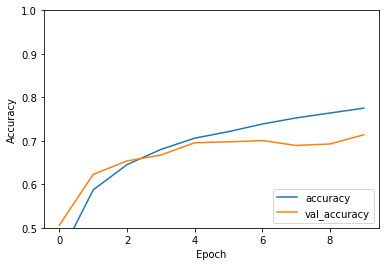

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
model.save("models\\tf_model")

INFO:tensorflow:Assets written to: models\tf_model\assets


The model is now saved.  
It can be converted to TF Lite now.  

## Convert

In [14]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("models\\tf_model\\")
tflite_model = converter.convert()
open("models\\tf_model\\converted_model.tflite", "wb").write(tflite_model)

493260